In [1]:
import urllib.request

url = "ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_29/gencode.v29.annotation.gff3.gz"
output_file = "gencode.v29.annotation.gff3.gz"

urllib.request.urlretrieve(url, output_file)

print("Download completed!")

Download completed!


In [2]:
import pandas as pd
import numpy as np

#Erwtima 1
gencode = pd.read_table("ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_29/gencode.v29.annotation.gff3.gz", comment="#",
                        sep = "\t", names = ['seqname', 'source', 'feature', 'start' , 'end', 'score', 'strand', 'frame', 'attribute'])
gencode.head()


,seqname,source,feature,start,end,score,strand,frame,attribute
0,chr1,HAVANA,gene,11869,14409,.,+,.,ID=ENSG00000223972.5;gene_id=ENSG00000223972.5...
1,chr1,HAVANA,transcript,11869,14409,.,+,.,ID=ENST00000456328.2;Parent=ENSG00000223972.5;...
2,chr1,HAVANA,exon,11869,12227,.,+,.,ID=exon:ENST00000456328.2:1;Parent=ENST0000045...
3,chr1,HAVANA,exon,12613,12721,.,+,.,ID=exon:ENST00000456328.2:2;Parent=ENST0000045...
4,chr1,HAVANA,exon,13221,14409,.,+,.,ID=exon:ENST00000456328.2:3;Parent=ENST0000045...


In [3]:
#Erwtima 1
gencode_genes = gencode[['seqname','feature','start', 'end', 'strand']].copy().reset_index().drop('index', axis=1) # Extract genes
gencode_genes.head()

,seqname,feature,start,end,strand
0,chr1,gene,11869,14409,+
1,chr1,transcript,11869,14409,+
2,chr1,exon,11869,12227,+
3,chr1,exon,12613,12721,+
4,chr1,exon,13221,14409,+


In [4]:
gencode_genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739373 entries, 0 to 2739372
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   seqname  object
 1   feature  object
 2   start    int64 
 3   end      int64 
 4   strand   object
dtypes: int64(2), object(3)
memory usage: 104.5+ MB


In [5]:
#Erwtima 2
from collections import Counter
count  = pd.Series(gencode['feature'].str.replace('[\[\]\']','').str.split(',').map(Counter).sum())
print ("Kataxoriseis")
count.head(4)

Kataxoriseis


gene            58721
transcript     206694
exon          1262773
CDS            747492
dtype: int64

In [6]:
#Erwtima 3
x = gencode.loc[gencode['feature'] == 'gene']
print ("Kataxwriseis  gia ta gonidia gene ana xromosoma seqname")

print (x[['seqname','feature']])

Kataxwriseis  gia ta gonidia gene ana xromosoma seqname
        seqname feature
0          chr1    gene
12         chr1    gene
25         chr1    gene
28         chr1    gene
36         chr1    gene
...         ...     ...
2739354    chrM    gene
2739359    chrM    gene
2739362    chrM    gene
2739367    chrM    gene
2739370    chrM    gene

[58721 rows x 2 columns]


In [7]:
#Erwtima 4
def gene_info(x):
   
    g_id = list(filter(lambda x: 'gene_id' in x,  x.split(";")))[0].split("=")[1]
    g_name = list(filter(lambda x: 'gene_name' in x,  x.split(";")))[0].split("=")[1]
    g_type = list(filter(lambda x: 'gene_type' in x,  x.split(";")))[0].split("=")[1]
    level =  list(filter(lambda x: 'level' in x,  x.split(";")))[0].split("=")[1]
   
    
    return (g_id, g_name, g_type,level)

In [8]:
gencode["gene_name"], gencode["gene_type"], gencode["gene_id"],gencode["level"] = zip(*gencode.attribute.apply(lambda x: gene_info(x)))
gencode.head()

,seqname,source,feature,start,end,score,strand,frame,attribute,gene_name,gene_type,gene_id,level
0,chr1,HAVANA,gene,11869,14409,.,+,.,ID=ENSG00000223972.5;gene_id=ENSG00000223972.5...,ENSG00000223972.5,DDX11L1,transcribed_unprocessed_pseudogene,2
1,chr1,HAVANA,transcript,11869,14409,.,+,.,ID=ENST00000456328.2;Parent=ENSG00000223972.5;...,ENSG00000223972.5,DDX11L1,transcribed_unprocessed_pseudogene,2
2,chr1,HAVANA,exon,11869,12227,.,+,.,ID=exon:ENST00000456328.2:1;Parent=ENST0000045...,ENSG00000223972.5,DDX11L1,transcribed_unprocessed_pseudogene,2
3,chr1,HAVANA,exon,12613,12721,.,+,.,ID=exon:ENST00000456328.2:2;Parent=ENST0000045...,ENSG00000223972.5,DDX11L1,transcribed_unprocessed_pseudogene,2
4,chr1,HAVANA,exon,13221,14409,.,+,.,ID=exon:ENST00000456328.2:3;Parent=ENST0000045...,ENSG00000223972.5,DDX11L1,transcribed_unprocessed_pseudogene,2


In [9]:
print(gencode.gene_name)

0          ENSG00000223972.5
1          ENSG00000223972.5
2          ENSG00000223972.5
3          ENSG00000223972.5
4          ENSG00000223972.5
                 ...        
2739368    ENSG00000210195.2
2739369    ENSG00000210195.2
2739370    ENSG00000210196.2
2739371    ENSG00000210196.2
2739372    ENSG00000210196.2
Name: gene_name, Length: 2739373, dtype: object


In [11]:
#Ervtima 5
gencode['gene_name'].value_counts().head(10)


gene_name
ENSG00000109339.21    4614
ENSG00000156113.22    4366
ENSG00000155657.26    4066
ENSG00000100150.17    2893
ENSG00000183091.19    2780
ENSG00000006071.13    2593
ENSG00000127616.18    2509
ENSG00000006283.17    2417
ENSG00000151067.21    2326
ENSG00000103197.17    2134
Name: count, dtype: int64

In [12]:
#Ervtima 6
gencode['Parent'] = gencode['attribute'].str.extract(r'Parent=([^;]+)')
gencode['Parent'].value_counts().head(1)


Parent
ENST00000589042.5    730
Name: count, dtype: int64

In [13]:
#Erwtima 7
exons = gencode[gencode['feature'] == 'exon']
exons['Parent'] = exons['attribute'].str.extract(r'Parent=([^;]+)')
exons['Parent'].value_counts().head(1)


C:\Users\franc\AppData\Local\Temp\ipykernel_20680\1084947878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exons['Parent'] = exons['attribute'].str.extract(r'Parent=([^;]+)')


Parent
ENST00000589042.5    363
Name: count, dtype: int64

In [14]:
#Erwtima 8
gencode['gene_id'] = gencode['attribute'].str.extract(r'gene_id=([^;]+)')
gencode['transcript_id'] = gencode['attribute'].str.extract(r'transcript_id=([^;]+)')
gene_transcript = gencode[['gene_id', 'transcript_id']].dropna().drop_duplicates()
gene_transcript['gene_id'].value_counts().head(1)


gene_id
ENSG00000109339.21    192
Name: count, dtype: int64

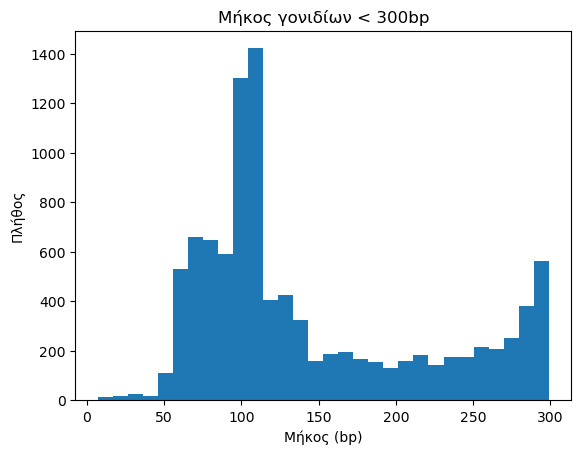

In [15]:
#Erwtima 9 
gencode['length'] = gencode['end'] - gencode['start']
short_genes = gencode[(gencode['feature'] == 'gene') & (gencode['length'] < 300)]
import matplotlib.pyplot as plt
plt.hist(short_genes['length'], bins=30)
plt.title("Μήκος γονιδίων < 300bp")
plt.xlabel("Μήκος (bp)")
plt.ylabel("Πλήθος")
plt.show()
